In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('cancer_data.csv')

In [23]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [26]:
df.shape

(1000, 26)

In [13]:
print(df.columns)


Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [14]:
print(df.isna().sum())


index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [15]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [16]:
print(df.describe())

             index          Age       Gender  Air Pollution  Alcohol use  \
count  1000.000000  1000.000000  1000.000000      1000.0000  1000.000000   
mean    499.500000    37.174000     1.402000         3.8400     4.563000   
std     288.819436    12.005493     0.490547         2.0304     2.620477   
min       0.000000    14.000000     1.000000         1.0000     1.000000   
25%     249.750000    27.750000     1.000000         2.0000     2.000000   
50%     499.500000    36.000000     1.000000         3.0000     5.000000   
75%     749.250000    45.000000     2.000000         6.0000     7.000000   
max     999.000000    73.000000     2.000000         8.0000     8.000000   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count   1000.000000           1000.000000   1000.000000           1000.000000   
mean       5.165000              4.840000      4.580000              4.380000   
std        1.980833              2.107805      2.126999              1.8

In [20]:
df.duplicated().any()

False

In [24]:
df['Patient Id'].unique().any()


'P1'

['Patient Id' 'Level']
P1      1
P702    1
P691    1
P692    1
P693    1
       ..
P402    1
P403    1
P404    1
P405    1
P999    1
Name: Patient Id, Length: 1000, dtype: int64
High      365
Medium    332
Low       303
Name: Level, dtype: int64


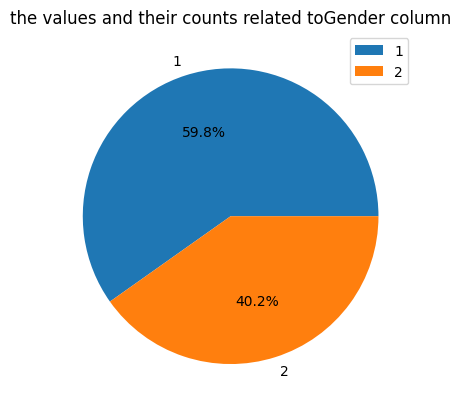

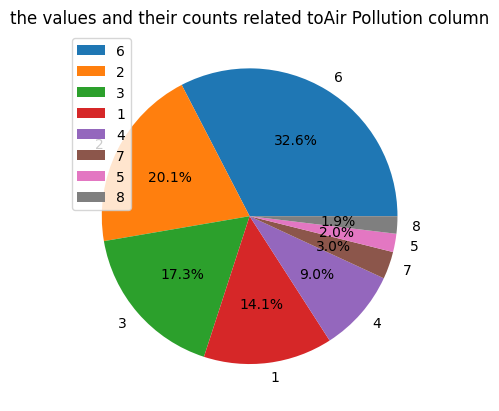

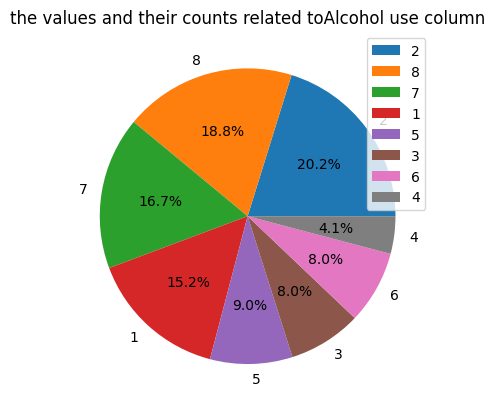

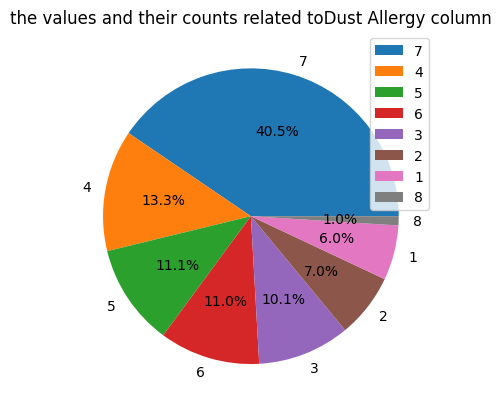

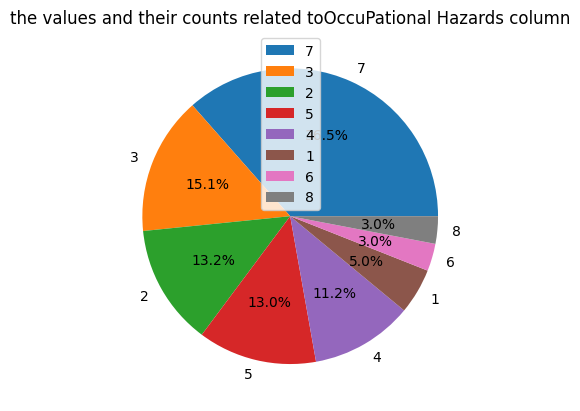

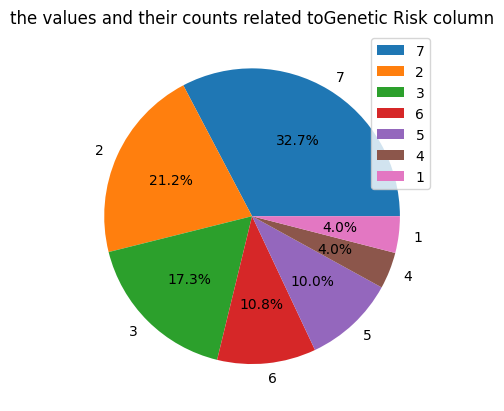

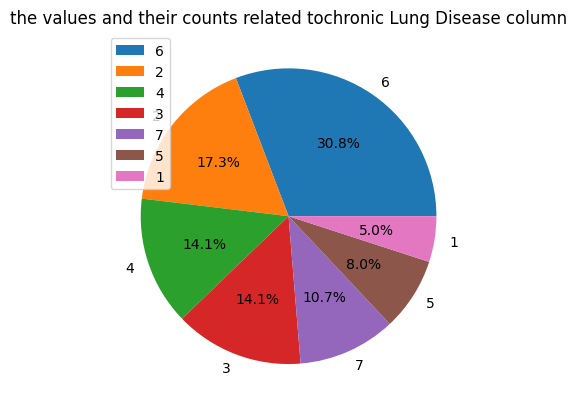

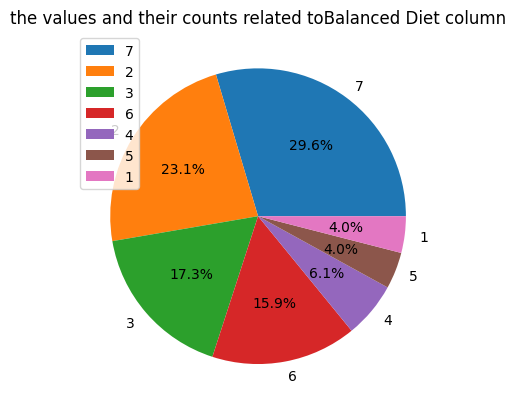

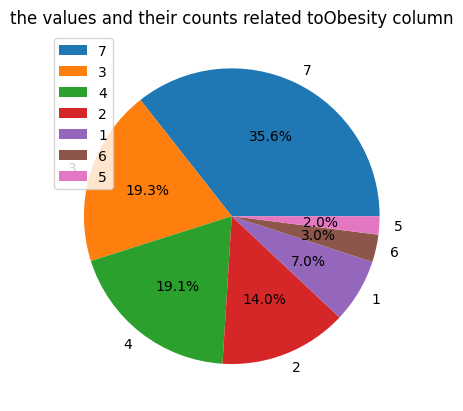

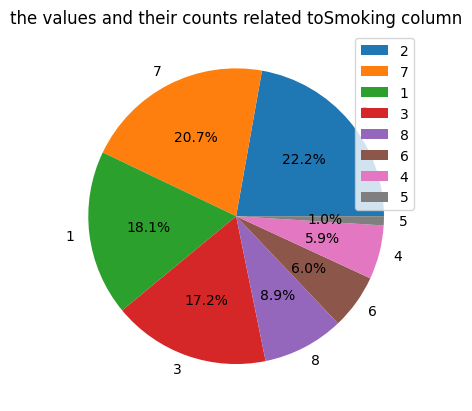

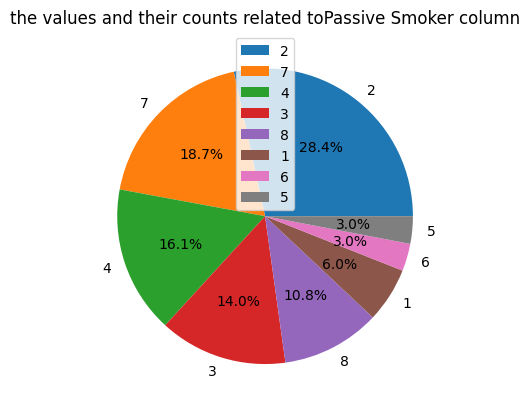

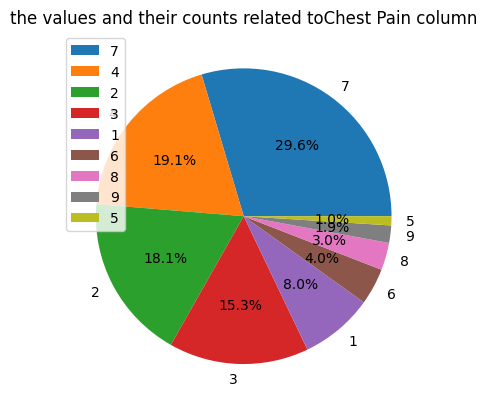

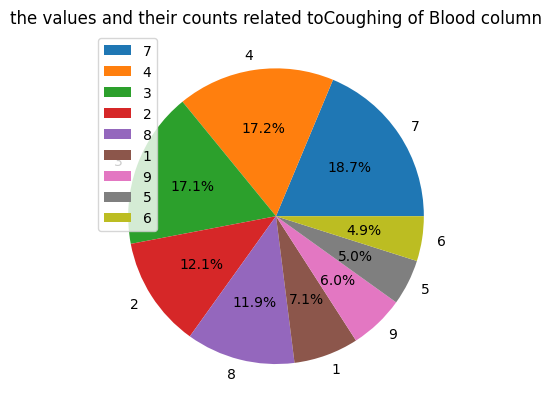

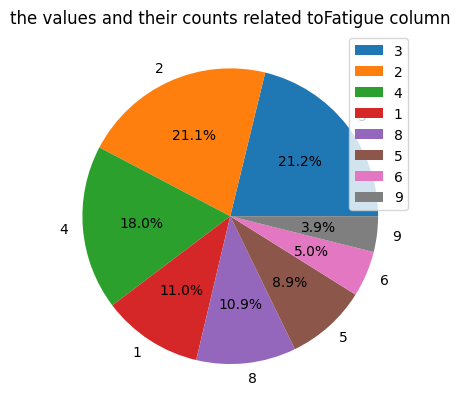

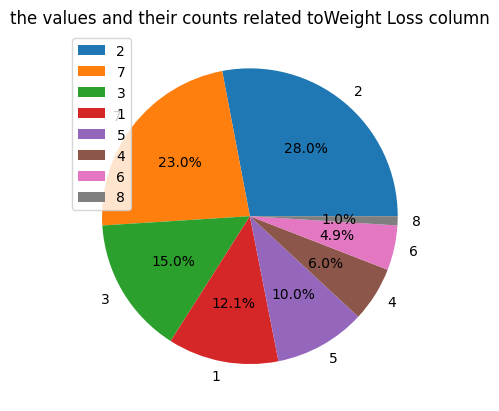

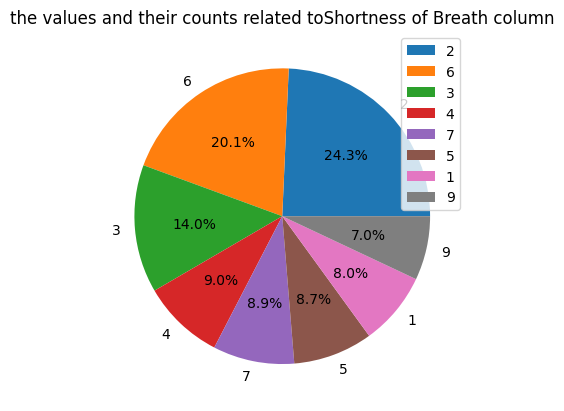

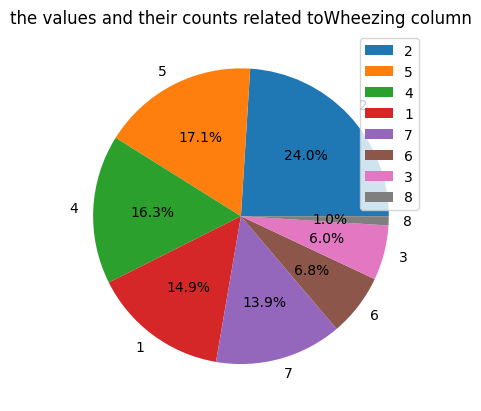

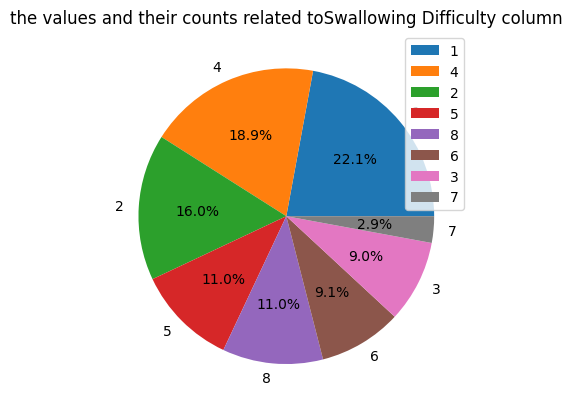

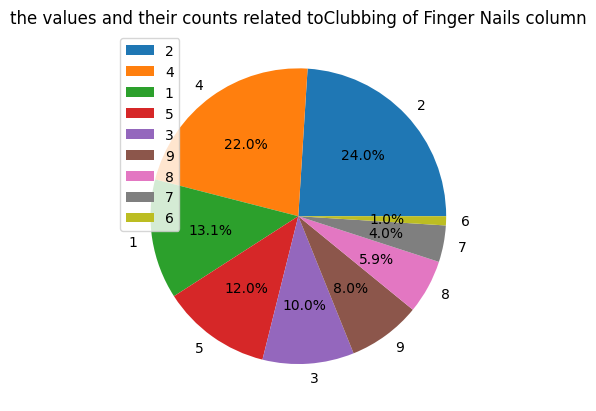

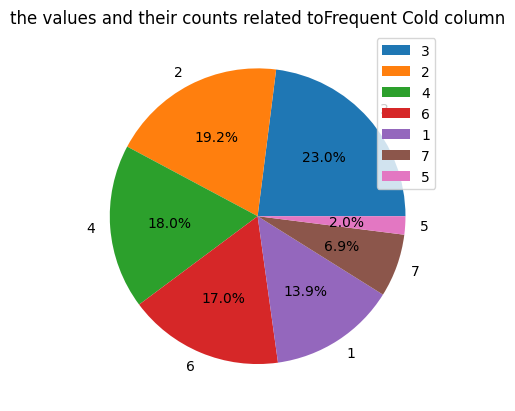

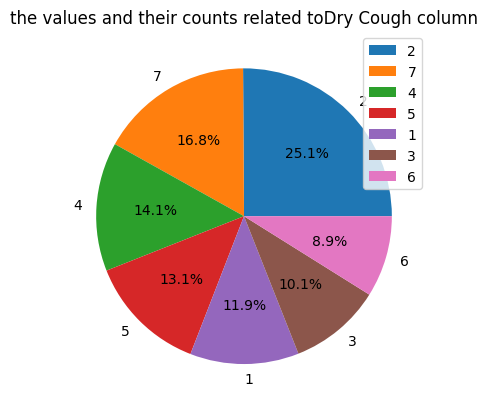

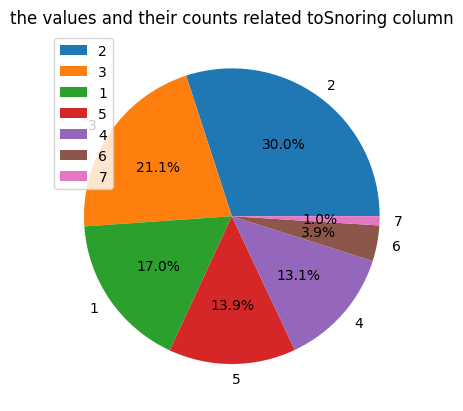

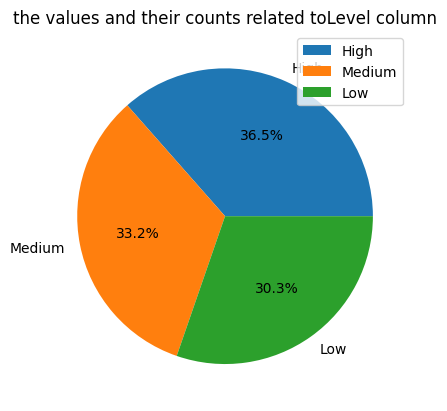

In [12]:
print(df.select_dtypes(include='object').columns.values)

for i in df.select_dtypes(include='object').columns.values:
    print(df[i].value_counts())

for i in df.columns.values:
    index=df[i].value_counts().index.values
    val=df[i].value_counts().values
    if (len(index) and len(val)) <=10:
        plt.pie(val,labels=index,autopct='%1.1f%%')
        plt.title(f'the values and their counts related to{i} column')
        plt.legend()
        plt.show()

C:\Users\Aarti Darji\AppData\Local\Temp\ipykernel_8764\2762972571.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(['Patient Id'],axis=1).corr(method='spearman')


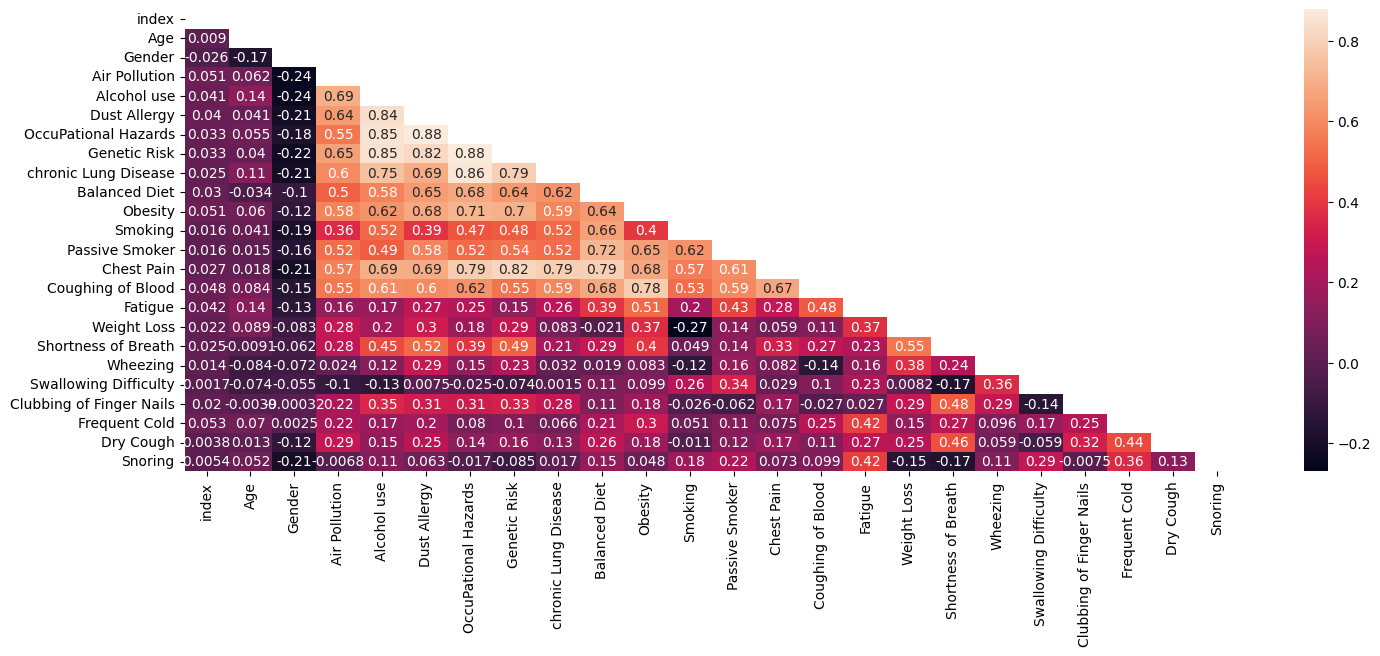

In [19]:
plt.figure(figsize=(17, 6))
corr = df.drop(['Patient Id'],axis=1).corr(method='spearman')
my_m = np.triu(corr)
sns.heatmap(corr, mask=my_m, annot=True)
plt.show()